### Simulation of geodesic using einsteinpy

In [1]:

import numpy as np
import astropy.units as u

from plotly.offline import init_notebook_mode

from einsteinpy.plotting import GeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential, BoyerLindquistDifferential, CartesianDifferential
from einsteinpy.bodies import Body
from einsteinpy.geodesic import Geodesic
from einsteinpy.metric import Kerr

init_notebook_mode(connected=True)

#### numba library can be added to optimise the performance of the numpy array during the calculation


/opt/anaconda3/lib/python3.7/site-packages/einsteinpy/ijit.py:31: UserWarning:

Could not import numba package. All einsteinpy functions will work properly but the CPU intensive algorithms will be slow. Consider installing numba to boost performance.



##### User input and initialisation

In [2]:
# Example: Simulating Earth

## Source ##

m = 2e30 # kg

spin_factor = 0 # spin_factor = J/(Mc) (metres)

## Test Particle ##

# initial position cordinates

r = 1.47e11                      # (metres)

theta = np.pi*0.4999999999                # (radians)

phi = np.pi                      # (radians)

# initial velocity vectors at initial position

Vr = 0                           # (m/s)

Vtheta = 0                       # (rad/s)
 
Vphi = 30.29e3/1.47e11           # (rad/s)


In [3]:
# Source 

Attractor = Body(name="attracter", mass=m * u.kg, a=spin_factor*u.m, parent=None)

# Test Object initial position (in spherical coordinates) & initial velocity
sph_obj = BoyerLindquistDifferential(r*u.m, theta*u.rad, phi*u.rad, Vr*u.m/u.s, Vtheta*u.rad/u.s, Vphi*u.rad/u.s, spin_factor*u.m)
####sph_obj = SphericalDifferential(r*u.m, theta*u.rad, phi*u.rad, Vr*u.m/u.s, Vtheta*u.rad/u.s, Vphi*u.rad/u.s)
Object = Body(name="testparticle", differential=sph_obj, parent=Attractor)

# geodesic simulation
geodesic = Geodesic(body=Object, time=0 * u.s, end_lambda= ((1 * u.year).to(u.s)).value, step_size=((50 * u.min).to(u.s)).value, metric=Kerr)

#### Plotting the trajectory of test particle in x-y plane

In [4]:
obj = GeodesicPlotter()
obj.plot(geodesic)
obj.show()


#### Animation of the trajectory of the test particle

<IPython.core.display.Javascript object>


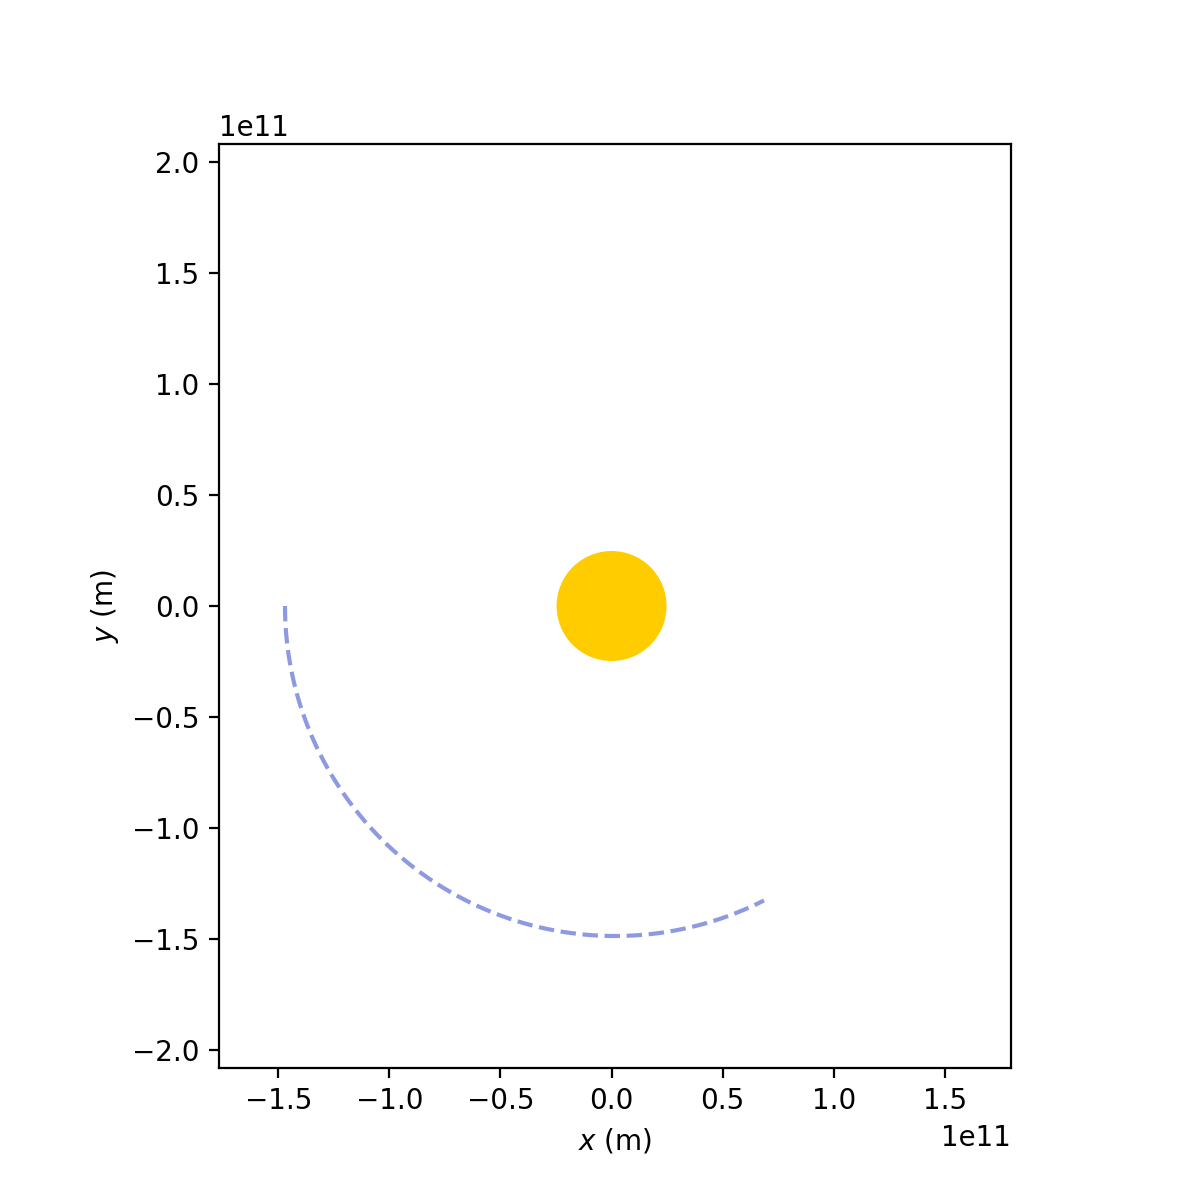

In [6]:
from einsteinpy.plotting import StaticGeodesicPlotter
%matplotlib notebook
obj = StaticGeodesicPlotter()
obj.animate(geodesic, interval=1)
obj.show()

#### Plotting the trajectory of test particle in 3-D space

<IPython.core.display.Javascript object>


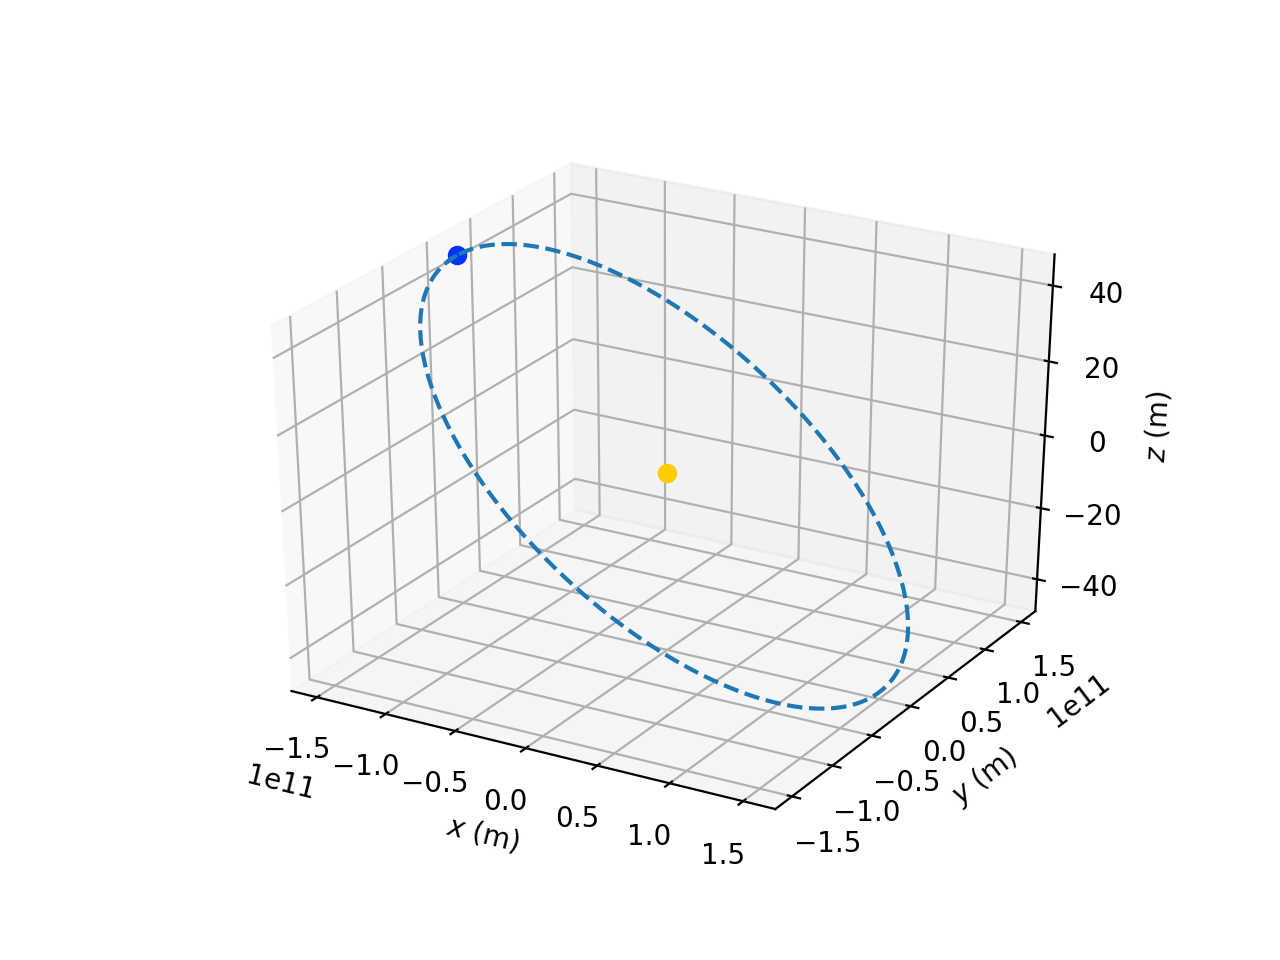

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
vals = geodesic.trajectory
x = np.array(vals[:, 1])
y = np.array(vals[:, 2])
z = np.array(vals[:, 3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("$z$ (m)")
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")
ax.plot3D([x[0]], [y[0]], [z[0]], "o", color="#0033ff")
ax.plot3D([0], [0], [0], "o", color="#ffcc00")
ax.plot3D(x, y, z, "--")
plt.show()

### Bending of light due to static mass using null geodesic

In [9]:
### 1919 Eddington Experiment

from scipy.constants import G, c, pi
mo = (G*m)/(c*c)
deflection = (4*mo)/(696340000)  # radius of sun = 696340000 m
print(deflection*(180/pi)*60*60) # in arcseconds


1.7597788540881136


##### Deflection of light for non-grazing distance due to sun

In [10]:
min_dist_app = min(np.sqrt(x*x+y*y+z*z))

deflection = (4*mo)/(min_dist_app)  # angle in radian
print(deflection*(180/pi)*60*60) # in arcseconds


0.008336084403100116


### Deflection of light due to spinning mass

In [14]:
a = 0.3
s = 1  # s = +1 for direct motion
       # s = -1 for retrograde motion
b = min_dist_app
    
deflection = 4*(mo/b)+((15*pi/4)-4*s*a)*((mo/b)**2)+((128/3)-10*pi*s*a+4*a*a)*((mo/b)**3)+((3465*pi/64)-192*s*a+(285*pi/16)*a*a-4*s*a*a*a)*(mo/b)**4
print(deflection*(180/pi)*60*60)

0.008336084625894729


In [138]:
spin_factor = 0 * u.m
x=696340000
y=-1e9
z=0
Vx=0
Vy=c
Vz=0
Attractor = Body(name="BH", mass = m * u.kg, a = spin_factor)
BL_obj = CartesianDifferential(x * u.m, y * u.m, z * u.m, Vx * u.m / u.s, Vy * u.m / u.s, Vz * u.m / u.s)
Particle = Body(differential = BL_obj, parent = Attractor)
geodesic = Geodesic(body = Particle, end_lambda = ((1 * u.year).to(u.s)).value/505000, step_size = ((0.05 * u.min).to(u.s)).value, metric=Kerr)
geodesic.trajectory  # get the values of the trajectory

/opt/anaconda3/lib/python3.7/site-packages/einsteinpy/metric/kerr.py:150: RuntimeWarning:

particle reached event horizon. 



array([[ 0.00000000e+00,  6.96340000e+08, -1.00000000e+09,
         7.46153033e-08,  1.41421587e+00,  0.00000000e+00,
         2.99792458e+08, -1.50644925e-08],
       [ 3.39412053e+00,  6.95493367e+08, -2.80472492e+08,
         4.59191864e-08,  1.41421802e+00, -2.34794255e+05,
         3.01195037e+08, -1.67965630e-08],
       [ 6.40295902e+00,  6.89101106e+08,  3.58092786e+08,
         4.75523736e-08,  1.41421783e+00, -1.34500760e+07,
         2.96299105e+08, -1.49849718e-08],
       [ 9.41179448e+00,  6.59374077e+08,  9.84718758e+08,
         7.25660120e-08,  1.41421597e+00, -1.92676495e+07,
         2.90689228e+08, -5.56051640e-09],
       [ 1.84321806e+01,  2.22081539e+09,  1.00270661e+09,
        -3.91849091e-07,  1.41421789e+00,  4.57944464e+09,
        -1.86552947e+09,  2.89488447e-07],
       [ 1.88208041e+01,  3.47930995e+09,  4.89808843e+08,
        -5.65032846e-07,  1.41421737e+00,  4.58021297e+09,
        -1.86814909e+09,  1.08681203e-08],
       [ 1.92094274e+01,  4.737921

In [139]:
obj = GeodesicPlotter()
obj.plot(geodesic)
obj.show()

<IPython.core.display.Javascript object>


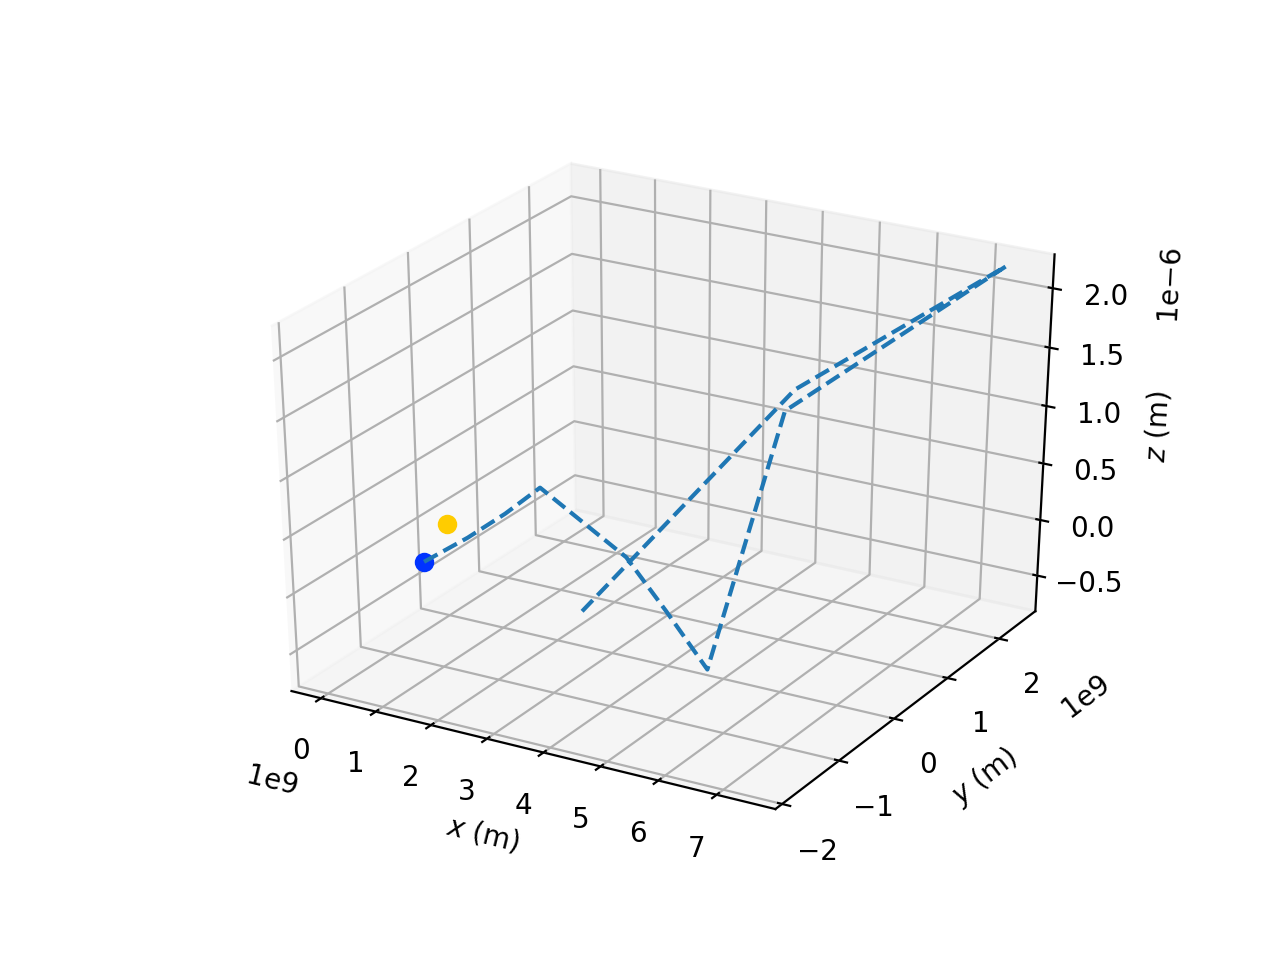

In [137]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
vals = geodesic.trajectory
x = np.array(vals[:, 1])
y = np.array(vals[:, 2])
z = np.array(vals[:, 3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("$z$ (m)")
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")
ax.plot3D([x[0]], [y[0]], [z[0]], "o", color="#0033ff")
ax.plot3D([0], [0], [0], "o", color="#ffcc00")
ax.plot3D(x, y, z, "--")
plt.show()

6.123235480282202e-05
